#  ONE DAY & 30 DAYS FORECASTING

In [257]:
#from https://wire.insiderfinance.io/game-stop-stock-market-price-prediction-using-rnn-lstm-7d6cfabfad51

In [258]:
#See the yahoo finance ticker for your stock symbol

#stock_symbol = '^GSPC'
stock_symbol = '^VIX'

#stock_symbol = 'CL=F'
#stock_symbol = 'NG=F'

#stock_symbol = 'GC=F'
#stock_symbol = 'SI=F'
#stock_symbol = 'HG=F'

#stock_symbol = 'EURUSD=X'
#stock_symbol = 'EURCHF=X'

Object_study = 'VIX'

In [259]:
#pip install yfinance

In [260]:
#pip install plotly==5.3.1

In [261]:
#import plotly.graph_objs as go
import yfinance as yf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
#from plotly.graph_objs import graph_objs
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [262]:
origdata = yf.download(tickers=stock_symbol, period='5y', interval='1d')
origdata

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-23,12.300000,12.620000,11.590000,11.770000,11.770000,0
2017-01-24,11.820000,11.890000,11.040000,11.070000,11.070000,0
2017-01-25,10.790000,11.050000,10.510000,10.810000,10.810000,0
2017-01-26,10.610000,11.010000,10.600000,10.630000,10.630000,0
2017-01-27,10.570000,10.820000,10.300000,10.580000,10.580000,0
...,...,...,...,...,...,...
2022-01-14,20.110001,22.070000,19.049999,19.190001,19.190001,0
2022-01-18,21.180000,23.200001,21.180000,22.790001,22.790001,0
2022-01-19,23.120001,23.990000,21.850000,23.850000,23.850000,0


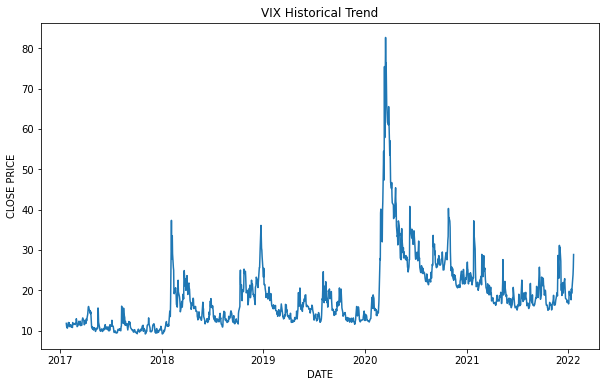

In [263]:
plt.title("{0} Historical Trend".format(Object_study))
plt.xlabel("DATE")
plt.ylabel("CLOSE PRICE")
plt.plot(origdata['Close'])

In [264]:
origdata = origdata.filter(['Close'])
origdata

,Close
Date,
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-14,19.190001
2022-01-18,22.790001
2022-01-19,23.850000


In [265]:
# Create isocalendar
closingdata = origdata
closingdata["week"] = closingdata.index.isocalendar().week

# Completing Time Series
idx = pd.date_range(closingdata.index[0], closingdata.index[-1]) #create dates for completed time series
completedata =closingdata.reindex(idx, fill_value= float("NaN")) #complete missing dates with NAN
completedata = completedata.fillna(method='ffill') #fill NAN with last observation (e.g., Value for Friday on Weekend)


In [266]:
cols_to_keep = ["Close"]
alldata = completedata.loc[:,cols_to_keep]
alldata

,Close
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-17,19.190001
2022-01-18,22.790001
2022-01-19,23.850000
2022-01-20,25.590000


In [267]:
#data=data.reset_index()

In [268]:
alldata.dtypes

Close    float64
dtype: object

In [269]:
dataset = alldata.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1460

In [270]:
dataset.shape

(1825, 1)

# scaling data

In [271]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [272]:
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.03575799],
       [0.02624064],
       [0.02270564],
       ...,
       [0.19999999],
       [0.22365737],
       [0.26798096]])

In [273]:
scaled_dataset.shape

(1825, 1)

# create training dataset

In [274]:
#Create the training data set and the scaled training data set
data_trainingscaled = scaler.fit_transform(dataset[:training_data_len])
data_trainingscaled

array([[0.03575799],
       [0.02624064],
       [0.02270564],
       ...,
       [0.19170631],
       [0.16913663],
       [0.16560162]])

In [275]:
data_trainingscaled.shape

(1460, 1)

In [276]:
#split the data into x_train and y_train data sets
x_train = []
y_train = []

In [277]:
#set training for 60 days # data_training.shape[0]


for i in range(60, data_trainingscaled.shape[0]):
    x_train.append(data_trainingscaled[i-60 : i])
    y_train.append(data_trainingscaled[i,0])



In [278]:
#convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train) , np.array(y_train)

In [279]:
print(x_train.shape)
print(y_train.shape)

(1400, 60, 1)
(1400,)


In [280]:
x_train.shape

(1400, 60, 1)

In [281]:
y_train.shape

(1400,)

# create the model using LSTM ReLu using Sequential function  and NN 50-50-25-1

In [282]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import LSTM,Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D

In [283]:
model = Sequential()

In [284]:
# be careful to the x_train.shape[1],***
model.add(LSTM(units=50,activation='relu',return_sequences=True ,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation='relu',return_sequences=False ))
model.add(Dropout(0.2))
#model.add(LSTM(units=25,activation='relu',return_sequences=True ))
#model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(units=1))

In [285]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
__________________________________________________

In [286]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [287]:
#train the model
model.fit(x_train,y_train, epochs = 50, batch_size = 32)

Epoch 1/50
44/44 [==============================] - 5s 54ms/step - loss: 0.0183
Epoch 2/50
44/44 [==============================] - 2s 53ms/step - loss: 0.0029
Epoch 3/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0020
Epoch 4/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0026
Epoch 5/50
44/44 [==============================] - 2s 55ms/step - loss: 0.0026
Epoch 6/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0020
Epoch 7/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0025
Epoch 8/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0018
Epoch 9/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0022
Epoch 10/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0024
Epoch 11/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0016
Epoch 12/50
44/44 [==============================] - 2s 54ms/step - loss: 0.0026
Epoch 13/50
44/44 [==================

# preparing for test data set

In [288]:
data_testing = dataset[training_data_len:]
data_testing.shape

(365, 1)

In [289]:
#create a new array containing scaled values 
data_testingscaled = scaler.transform(data_testing)
data_testingscaled.shape

(365, 1)

In [290]:
x_test = []
y_test = []

#set testing for 60 days 

for i in range(60, data_testingscaled.shape[0]):
    x_test.append(data_testingscaled[i-60 : i])
    y_test.append(data_testingscaled[i,0])

In [291]:
#the lists coming out from the previous block need to be transformed in a numy array
x_test , y_test = np.array(x_test) ,np.array(y_test)

In [292]:
x_test.shape

(305, 60, 1)

In [293]:
y_test.shape

(305,)

In [294]:
y_test = np.reshape(y_test,(y_test.shape[0],1))
y_test.shape

(305, 1)

In [295]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[20.29999924],
       [21.20000076],
       [19.80999947],
       [18.86000061],
       [18.86000061],
       [18.86000061],
       [20.73999977],
       [19.61000061],
       [19.39999962],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.90999985],
       [18.12000084],
       [17.15999985],
       [16.95000076],
       [16.69000053],
       [16.69000053],
       [16.69000053],
       [16.90999985],
       [16.64999962],
       [16.98999977],
       [16.56999969],
       [16.25      ],
       [16.25      ],
       [16.25      ],
       [17.29000092],
       [18.68000031],
       [17.5       ],
       [18.70999908],
       [17.32999992],
       [17.32999992],
       [17.32999992],
       [17.63999939],
       [17.55999947],
       [17.28000069],
       [17.61000061],
       [18.61000061],
       [18.61000061],
       [18.61000061],
       [18.30999947],
       [19.47999954],
       [19.14999962],
       [18.38999939],
       [16

In [296]:
# get the models predicted price values
y_prediction = model.predict(x_test)
#y_prediction=np.reshape(y_prediction,(y_prediction.shape[0],y_prediction.shape[1]))
y_prediction.shape

(305, 1)

In [297]:
print(y_prediction)

[[0.16763031]
 [0.16535322]
 [0.17028855]
 [0.16806197]
 [0.16007754]
 [0.15319978]
 [0.14906573]
 [0.15727182]
 [0.1597746 ]
 [0.15894395]
 [0.14749464]
 [0.13624078]
 [0.1287296 ]
 [0.12502186]
 [0.12723848]
 [0.13140203]
 [0.12931634]
 [0.12518565]
 [0.12050471]
 [0.11739026]
 [0.11584805]
 [0.11662127]
 [0.1162701 ]
 [0.11780024]
 [0.11683412]
 [0.11374156]
 [0.11121199]
 [0.10973892]
 [0.1151482 ]
 [0.12797259]
 [0.13186347]
 [0.13856372]
 [0.13607875]
 [0.13165644]
 [0.12818779]
 [0.12797037]
 [0.1282056 ]
 [0.12689061]
 [0.127627  ]
 [0.13416483]
 [0.13983537]
 [0.14330289]
 [0.14331575]
 [0.14863326]
 [0.1515406 ]
 [0.14867789]
 [0.1368537 ]
 [0.12592362]
 [0.118729  ]
 [0.1314287 ]
 [0.15554264]
 [0.202716  ]
 [0.21611133]
 [0.19898964]
 [0.17710474]
 [0.1594286 ]
 [0.15386346]
 [0.16213514]
 [0.17540686]
 [0.17759769]
 [0.17378643]
 [0.16972426]
 [0.16704449]
 [0.15703943]
 [0.15053217]
 [0.13960266]
 [0.12808327]
 [0.12022045]
 [0.11620909]
 [0.11495379]
 [0.11510722]
 [0.12

In [298]:
#y_prediction= y_prediction.reshape(-1,1)
#y_prediction=pd.Dataframe(y_prediction)
y_prediction

array([[0.16763031],
       [0.16535322],
       [0.17028855],
       [0.16806197],
       [0.16007754],
       [0.15319978],
       [0.14906573],
       [0.15727182],
       [0.1597746 ],
       [0.15894395],
       [0.14749464],
       [0.13624078],
       [0.1287296 ],
       [0.12502186],
       [0.12723848],
       [0.13140203],
       [0.12931634],
       [0.12518565],
       [0.12050471],
       [0.11739026],
       [0.11584805],
       [0.11662127],
       [0.1162701 ],
       [0.11780024],
       [0.11683412],
       [0.11374156],
       [0.11121199],
       [0.10973892],
       [0.1151482 ],
       [0.12797259],
       [0.13186347],
       [0.13856372],
       [0.13607875],
       [0.13165644],
       [0.12818779],
       [0.12797037],
       [0.1282056 ],
       [0.12689061],
       [0.127627  ],
       [0.13416483],
       [0.13983537],
       [0.14330289],
       [0.14331575],
       [0.14863326],
       [0.1515406 ],
       [0.14867789],
       [0.1368537 ],
       [0.125

In [299]:
y_prediction = scaler.inverse_transform(y_prediction)

In [300]:
y_prediction.shape

(305, 1)

In [301]:
print(y_prediction)

[[21.469212]
 [21.30173 ]
 [21.664722]
 [21.50096 ]
 [20.913704]
 [20.407845]
 [20.103786]
 [20.707342]
 [20.891424]
 [20.83033 ]
 [19.988232]
 [19.160511]
 [18.608063]
 [18.335358]
 [18.498392]
 [18.804619]
 [18.651218]
 [18.347404]
 [18.003122]
 [17.774054]
 [17.660624]
 [17.717495]
 [17.691666]
 [17.804207]
 [17.73315 ]
 [17.505692]
 [17.319641]
 [17.211298]
 [17.60915 ]
 [18.552383]
 [18.83856 ]
 [19.331364]
 [19.148594]
 [18.823332]
 [18.568213]
 [18.552221]
 [18.569523]
 [18.472805]
 [18.526966]
 [19.007824]
 [19.424892]
 [19.67993 ]
 [19.680874]
 [20.071976]
 [20.285812]
 [20.07526 ]
 [19.205591]
 [18.401682]
 [17.872519]
 [18.806581]
 [20.580162]
 [24.049763]
 [25.03499 ]
 [23.775688]
 [22.166056]
 [20.865974]
 [20.45666 ]
 [21.06504 ]
 [22.041176]
 [22.20231 ]
 [21.921993]
 [21.62322 ]
 [21.426125]
 [20.690252]
 [20.211641]
 [19.407778]
 [18.560526]
 [17.982214]
 [17.68718 ]
 [17.59485 ]
 [17.606136]
 [18.133858]
 [18.439943]
 [18.807451]
 [18.420538]
 [17.930847]
 [17.581888]

In [302]:
y_prediction.shape

(305, 1)

In [303]:
#y_prediction=pd.DataFrame(y_prediction)
y_prediction

array([[21.469212],
       [21.30173 ],
       [21.664722],
       [21.50096 ],
       [20.913704],
       [20.407845],
       [20.103786],
       [20.707342],
       [20.891424],
       [20.83033 ],
       [19.988232],
       [19.160511],
       [18.608063],
       [18.335358],
       [18.498392],
       [18.804619],
       [18.651218],
       [18.347404],
       [18.003122],
       [17.774054],
       [17.660624],
       [17.717495],
       [17.691666],
       [17.804207],
       [17.73315 ],
       [17.505692],
       [17.319641],
       [17.211298],
       [17.60915 ],
       [18.552383],
       [18.83856 ],
       [19.331364],
       [19.148594],
       [18.823332],
       [18.568213],
       [18.552221],
       [18.569523],
       [18.472805],
       [18.526966],
       [19.007824],
       [19.424892],
       [19.67993 ],
       [19.680874],
       [20.071976],
       [20.285812],
       [20.07526 ],
       [19.205591],
       [18.401682],
       [17.872519],
       [18.806581],


In [304]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean (y_prediction - y_test)**2)
rmse

1.0209070987388735

# MANIPULATING DATA_TRAINING, DATA_TESTING & PREDICTION FOR PLOTTING

In [305]:
pdata_training = dataset[:training_data_len]
pdata_training=pd.DataFrame(pdata_training)

training_datadates = pd.DataFrame()
training_datadates['Date'] = pd.date_range('01/23/2017', periods = 1460 , freq ='d')

pdata_training.columns=['Actual_Close']
pdata_training = pd.concat([training_datadates,pdata_training],axis=1)

pdata_training.set_index(pdata_training["Date"], inplace=True)
pdata_training=pdata_training.drop(['Date'], axis=1)

pdata_training

,Actual_Close
Date,
2017-01-23,11.77
2017-01-24,11.07
2017-01-25,10.81
2017-01-26,10.63
2017-01-27,10.58
...,...
2021-01-17,24.34
2021-01-18,24.34
2021-01-19,23.24


In [306]:
pdata_testing = dataset[training_data_len:]
pdata_testing=pd.DataFrame(pdata_testing)

testing_datadates = pd.DataFrame()
testing_datadates['Date'] = pd.date_range('01/22/2021', periods = 365 , freq ='d')

pdata_testing.columns=['Actual_Close']
pdata_testing = pd.concat([testing_datadates,pdata_testing],axis=1)

pdata_testing.set_index(pdata_testing["Date"], inplace=True)
pdata_testing=pdata_testing.drop(['Date'], axis=1)

pdata_testing

,Actual_Close
Date,
2021-01-22,21.910000
2021-01-23,21.910000
2021-01-24,21.910000
2021-01-25,23.190001
2021-01-26,23.020000
...,...
2022-01-17,19.190001
2022-01-18,22.790001
2022-01-19,23.850000


In [307]:
y_prediction=pd.DataFrame(y_prediction)
y_prediction

,0
0,21.469212
1,21.301729
2,21.664722
3,21.500959
4,20.913704
...,...
300,20.443079
301,20.423395
302,21.738049
303,23.323519


In [308]:
y_prediction.columns=['Predicted_Close']
y_prediction

,Predicted_Close
0,21.469212
1,21.301729
2,21.664722
3,21.500959
4,20.913704
...,...
300,20.443079
301,20.423395
302,21.738049
303,23.323519


In [309]:
predictionsdates=pd.DataFrame()
predictionsdates['Date']=pd.date_range('03/23/2021', periods=305 ,freq='d')
predictionsdates

,Date
0,2021-03-23
1,2021-03-24
2,2021-03-25
3,2021-03-26
4,2021-03-27
...,...
300,2022-01-17
301,2022-01-18
302,2022-01-19
303,2022-01-20


In [310]:
y_prediction1=pd.concat([predictionsdates,y_prediction],axis=1)
y_prediction1

,Date,Predicted_Close
0,2021-03-23,21.469212
1,2021-03-24,21.301729
2,2021-03-25,21.664722
3,2021-03-26,21.500959
4,2021-03-27,20.913704
...,...,...
300,2022-01-17,20.443079
301,2022-01-18,20.423395
302,2022-01-19,21.738049
303,2022-01-20,23.323519


In [311]:
y_prediction1.set_index(y_prediction1["Date"], inplace=True)
y_prediction1

,Date,Predicted_Close
Date,,
2021-03-23,2021-03-23,21.469212
2021-03-24,2021-03-24,21.301729
2021-03-25,2021-03-25,21.664722
2021-03-26,2021-03-26,21.500959
2021-03-27,2021-03-27,20.913704
...,...,...
2022-01-17,2022-01-17,20.443079
2022-01-18,2022-01-18,20.423395
2022-01-19,2022-01-19,21.738049


In [312]:
newdf=y_prediction1.drop(['Date'], axis=1)
newdf.columns=['Predicted_Close']
newdf

,Predicted_Close
Date,
2021-03-23,21.469212
2021-03-24,21.301729
2021-03-25,21.664722
2021-03-26,21.500959
2021-03-27,20.913704
...,...
2022-01-17,20.443079
2022-01-18,20.423395
2022-01-19,21.738049


In [313]:
predvsactual = pd.concat([pdata_testing,newdf],axis=1)
predvsactual

,Actual_Close,Predicted_Close
Date,,
2021-01-22,21.910000,NaN
2021-01-23,21.910000,NaN
2021-01-24,21.910000,NaN
2021-01-25,23.190001,NaN
2021-01-26,23.020000,NaN
...,...,...
2022-01-17,19.190001,20.443079
2022-01-18,22.790001,20.423395
2022-01-19,23.850000,21.738049


<function matplotlib.pyplot.show(close=None, block=None)>

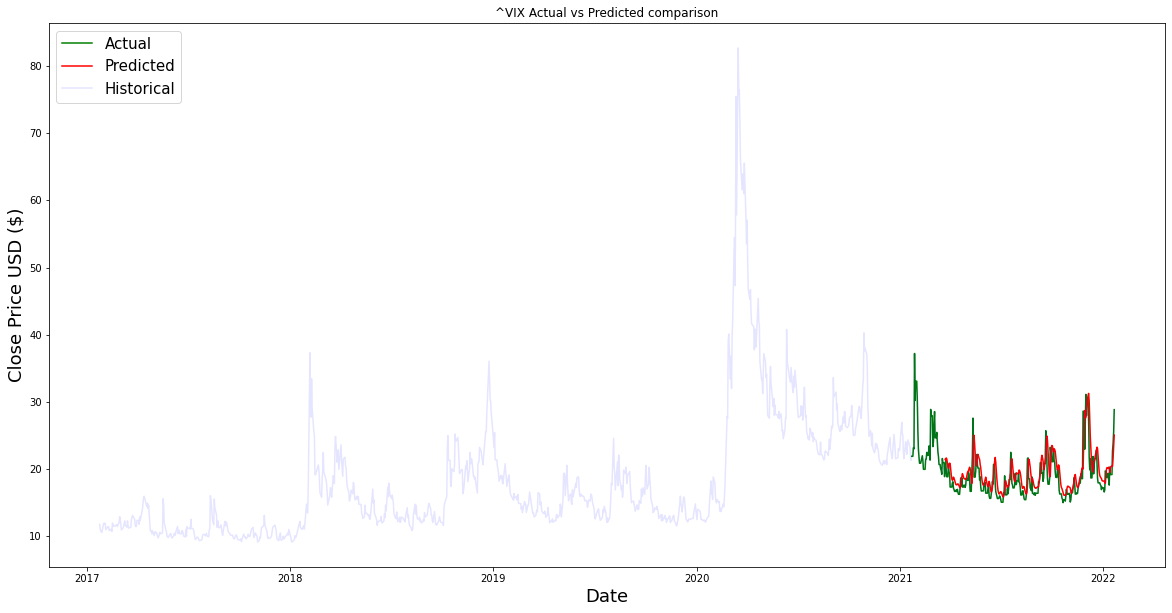

In [314]:
#visualize
plt.figure(figsize=(20,10))

plt.title("{0} Actual vs Predicted comparison".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(predvsactual['Actual_Close'],color='green', alpha=1,label='Actual')
plt.plot(predvsactual['Predicted_Close'],color='red', alpha=1,label='Predicted')
plt.plot(origdata['Close'],color='blue', alpha=0.1, label='Historical')

plt.legend(loc='upper left', fontsize=15)

plt.show

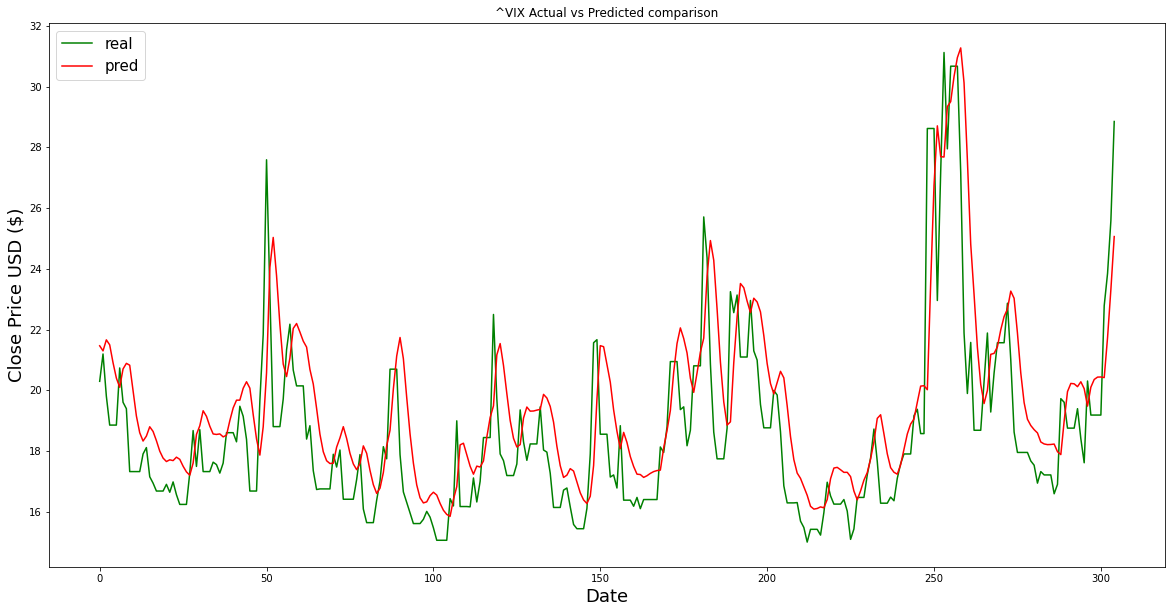

In [315]:
#visualize
plt.figure(figsize=(20,10))


plt.title("{0} Actual vs Predicted comparison".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(y_test, color= 'green' ,label ="real")
plt.plot(y_prediction, color= 'red' ,label ="pred")

plt.legend(loc='upper left', fontsize=15)

plt.show()


# FUTURE FORECAST

In [316]:
#Get the last 60 day closing price values and convert the dataframe to an array
last_360_days = alldata[-360:].values

In [317]:
last_360_days

array([[37.20999908],
       [30.20999908],
       [33.09000015],
       [33.09000015],
       [33.09000015],
       [30.23999977],
       [25.55999947],
       [22.90999985],
       [21.77000046],
       [20.87000084],
       [20.87000084],
       [20.87000084],
       [21.23999977],
       [21.62999916],
       [21.98999977],
       [21.25      ],
       [19.96999931],
       [19.96999931],
       [19.96999931],
       [19.96999931],
       [21.45999908],
       [21.5       ],
       [22.48999977],
       [22.04999924],
       [22.04999924],
       [22.04999924],
       [23.45000076],
       [23.11000061],
       [21.34000015],
       [28.88999939],
       [27.95000076],
       [27.95000076],
       [27.95000076],
       [23.35000038],
       [24.10000038],
       [26.67000008],
       [28.56999969],
       [24.65999985],
       [24.65999985],
       [24.65999985],
       [25.46999931],
       [24.03000069],
       [22.55999947],
       [21.90999985],
       [20.69000053],
       [20

In [318]:
#scale the data to be values between 0 and 1
last_360_days_scaled = scaler.transform(last_360_days)

In [319]:
#create an empty list
X_future = []

In [320]:
#append the past 360 days
X_future.append(last_360_days_scaled)

#convert the X_test data set to a numpy array
X_future = np.array(X_future)

#reshape the data
X_future = np.reshape(X_future,(X_future.shape[0], X_future.shape[1],1))

In [321]:
X_future.shape

(1, 360, 1)

In [322]:
pred_price = model.predict(X_future)

In [323]:
pred_price

array([[0.24868447]], dtype=float32)

In [324]:
#undo the scaling & predict for 08th March 2021
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[27.430744]]


# PLOTTING ONE DAY FORECAST

In [325]:
pred_price=pd.DataFrame(pred_price)
date = pd.DataFrame()
date['Date'] = pd.date_range('01/22/2022', periods = 1, freq ='d')
forecast = pd.concat([date,pred_price],axis=1)
forecast.set_index(forecast["Date"], inplace=True)
forecast=forecast.drop(['Date'], axis=1)
forecast.columns=['Forecasted_Close']
forecast

,Forecasted_Close
Date,
2022-01-22,27.430744


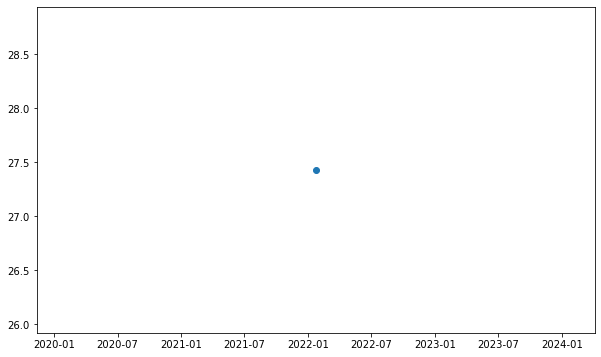

In [326]:
plt.scatter(date,forecast['Forecasted_Close'])

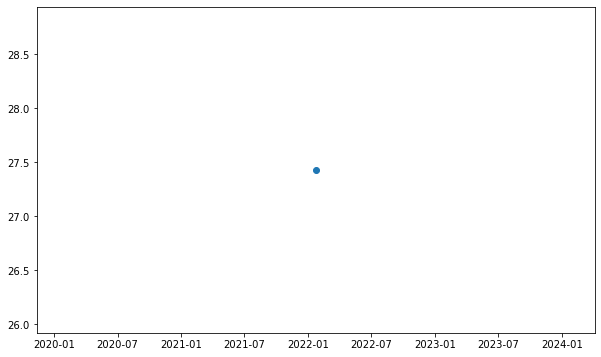

In [327]:
plt.scatter(date, forecast)

<function matplotlib.pyplot.show(close=None, block=None)>

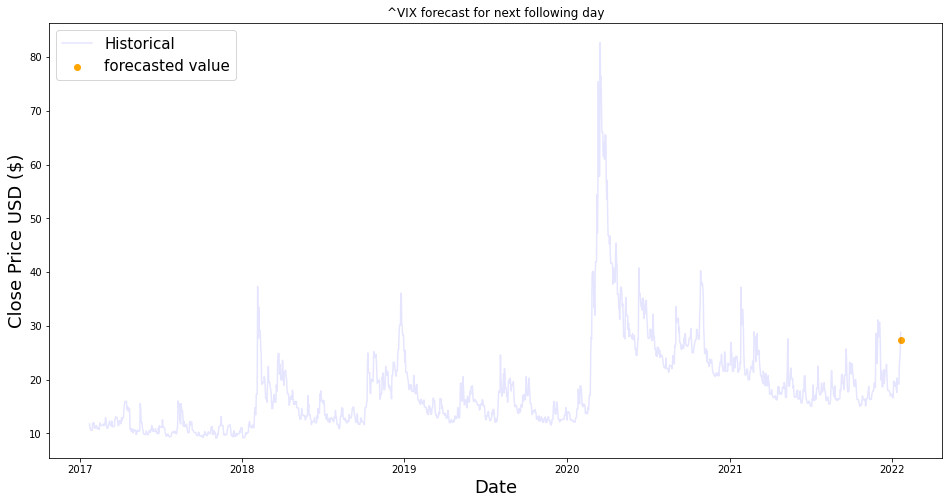

In [328]:
plt.figure(figsize=(16,8))

plt.title("{0} forecast for next following day".format(stock_symbol))
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(alldata['Close'],color='blue', alpha=0.1, label='Historical')
plt.scatter(date,forecast['Forecasted_Close'],color='orange', alpha=1, label='forecasted value')

plt.legend(loc='upper left', fontsize=15)

plt.show

# ZOOMING

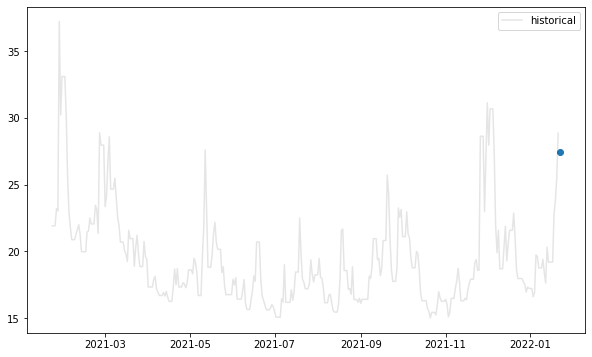

In [329]:
plt.plot(pdata_testing['Actual_Close'],color='black', alpha=0.1, label='historical')
plt.scatter(date,forecast['Forecasted_Close'])
plt.legend()

# 30 DAYS FORECAST

In [330]:
data_testingscaled

array([[0.17362337],
       [0.17362337],
       [0.17362337],
       [0.19102651],
       [0.18871516],
       [0.38164511],
       [0.28647176],
       [0.32562881],
       [0.32562881],
       [0.32562881],
       [0.28687966],
       [0.22324947],
       [0.18721957],
       [0.17171992],
       [0.15948335],
       [0.15948335],
       [0.15948335],
       [0.16451392],
       [0.16981643],
       [0.17471107],
       [0.16464989],
       [0.14724675],
       [0.14724675],
       [0.14724675],
       [0.14724675],
       [0.16750508],
       [0.16804894],
       [0.18150916],
       [0.17552683],
       [0.17552683],
       [0.17552683],
       [0.19456152],
       [0.18993882],
       [0.16587355],
       [0.26852479],
       [0.25574439],
       [0.25574439],
       [0.25574439],
       [0.1932019 ],
       [0.20339904],
       [0.23834125],
       [0.26417401],
       [0.2110129 ],
       [0.2110129 ],
       [0.2110129 ],
       [0.22202581],
       [0.20244731],
       [0.182

In [331]:
len(data_testingscaled)

365

In [332]:
x_input=data_testingscaled[265:].reshape(1,-1)
x_input.shape

(1, 100)

In [333]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [334]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.24868447]
101
1 day input [0.09734872 0.09734872 0.09734872 0.09748469 0.08919102 0.08633582
 0.07980965 0.08552005 0.08552005 0.08552005 0.08293677 0.09299795
 0.10659414 0.10047587 0.09680489 0.09680489 0.09680489 0.09884431
 0.09367777 0.08103331 0.085656   0.09979604 0.09979604 0.09979604
 0.10985722 0.11747111 0.13038748 0.11583955 0.09721279 0.09721279
 0.09721279 0.09993201 0.09830048 0.10836166 0.11488783 0.1192386
 0.1192386  0.1192386  0.13636981 0.139225   0.12834805 0.12834805
 0.26485384 0.26485384 0.26485384 0.18789937 0.24541128 0.29884432
 0.25574439 0.29272602 0.29272602 0.29272602 0.24527532 0.17335144
 0.14629502 0.16913663 0.12984364 0.12984364 0.12984364 0.15186946
 0.17335144 0.13800136 0.15540447 0.16900067 0.16900067 0.16900067
 0.18667573 0.16138681 0.12902785 0.1199184  0.1199184  0.1199184
 0.1199184  0.11611148 0.11420803 0.10618627 0.11135281 0.10985722
 0.10985722 0.10985722 0.1014276  0.10564241 0.14398367 0.14235214
 0.13079537 0.13079537 0.13079537 0

8 day output [[0.3078688]]
9 day input [0.08552005 0.08552005 0.08293677 0.09299795 0.10659414 0.10047587
 0.09680489 0.09680489 0.09680489 0.09884431 0.09367777 0.08103331
 0.085656   0.09979604 0.09979604 0.09979604 0.10985722 0.11747111
 0.13038748 0.11583955 0.09721279 0.09721279 0.09721279 0.09993201
 0.09830048 0.10836166 0.11488783 0.1192386  0.1192386  0.1192386
 0.13636981 0.139225   0.12834805 0.12834805 0.26485384 0.26485384
 0.26485384 0.18789937 0.24541128 0.29884432 0.25574439 0.29272602
 0.29272602 0.29272602 0.24527532 0.17335144 0.14629502 0.16913663
 0.12984364 0.12984364 0.12984364 0.15186946 0.17335144 0.13800136
 0.15540447 0.16900067 0.16900067 0.16900067 0.18667573 0.16138681
 0.12902785 0.1199184  0.1199184  0.1199184  0.1199184  0.11611148
 0.11420803 0.10618627 0.11135281 0.10985722 0.10985722 0.10985722
 0.1014276  0.10564241 0.14398367 0.14235214 0.13079537 0.13079537
 0.13079537 0.13949693 0.1260367  0.11529572 0.15186946 0.13664174
 0.13664174 0.13664174 0

16 day output [[0.34067884]]
17 day input [0.09680489 0.09884431 0.09367777 0.08103331 0.085656   0.09979604
 0.09979604 0.09979604 0.10985722 0.11747111 0.13038748 0.11583955
 0.09721279 0.09721279 0.09721279 0.09993201 0.09830048 0.10836166
 0.11488783 0.1192386  0.1192386  0.1192386  0.13636981 0.139225
 0.12834805 0.12834805 0.26485384 0.26485384 0.26485384 0.18789937
 0.24541128 0.29884432 0.25574439 0.29272602 0.29272602 0.29272602
 0.24527532 0.17335144 0.14629502 0.16913663 0.12984364 0.12984364
 0.12984364 0.15186946 0.17335144 0.13800136 0.15540447 0.16900067
 0.16900067 0.16900067 0.18667573 0.16138681 0.12902785 0.1199184
 0.1199184  0.1199184  0.1199184  0.11611148 0.11420803 0.10618627
 0.11135281 0.10985722 0.10985722 0.10985722 0.1014276  0.10564241
 0.14398367 0.14235214 0.13079537 0.13079537 0.13079537 0.13949693
 0.1260367  0.11529572 0.15186946 0.13664174 0.13664174 0.13664174
 0.13664174 0.18558804 0.19999999 0.22365737 0.26798096 0.24868447
 0.26270515 0.27209812 

24 day output [[0.36488295]]
25 day input [0.10985722 0.11747111 0.13038748 0.11583955 0.09721279 0.09721279
 0.09721279 0.09993201 0.09830048 0.10836166 0.11488783 0.1192386
 0.1192386  0.1192386  0.13636981 0.139225   0.12834805 0.12834805
 0.26485384 0.26485384 0.26485384 0.18789937 0.24541128 0.29884432
 0.25574439 0.29272602 0.29272602 0.29272602 0.24527532 0.17335144
 0.14629502 0.16913663 0.12984364 0.12984364 0.12984364 0.15186946
 0.17335144 0.13800136 0.15540447 0.16900067 0.16900067 0.16900067
 0.18667573 0.16138681 0.12902785 0.1199184  0.1199184  0.1199184
 0.1199184  0.11611148 0.11420803 0.10618627 0.11135281 0.10985722
 0.10985722 0.10985722 0.1014276  0.10564241 0.14398367 0.14235214
 0.13079537 0.13079537 0.13079537 0.13949693 0.1260367  0.11529572
 0.15186946 0.13664174 0.13664174 0.13664174 0.13664174 0.18558804
 0.19999999 0.22365737 0.26798096 0.24868447 0.26270515 0.27209812
 0.27970135 0.28633508 0.29232082 0.29783422 0.30299041 0.30786881
 0.31252396 0.31699201

In [335]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [336]:
alldata

,Close
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-17,19.190001
2022-01-18,22.790001
2022-01-19,23.850000
2022-01-20,25.590000


In [337]:
alldatareset=alldata.reset_index()['Close']

In [338]:
alldatareset

0       11.770000
1       11.070000
2       10.810000
3       10.630000
4       10.580000
          ...    
1820    19.190001
1821    22.790001
1822    23.850000
1823    25.590000
1824    28.850000
Name: Close, Length: 1825, dtype: float64

In [339]:
alldataresetscaled=scaler.fit_transform(np.array(alldatareset).reshape(-1,1))

In [340]:
alldataresetscaled

array([[0.03575799],
       [0.02624064],
       [0.02270564],
       ...,
       [0.19999999],
       [0.22365737],
       [0.26798096]])

In [341]:
len(alldataresetscaled)

1825

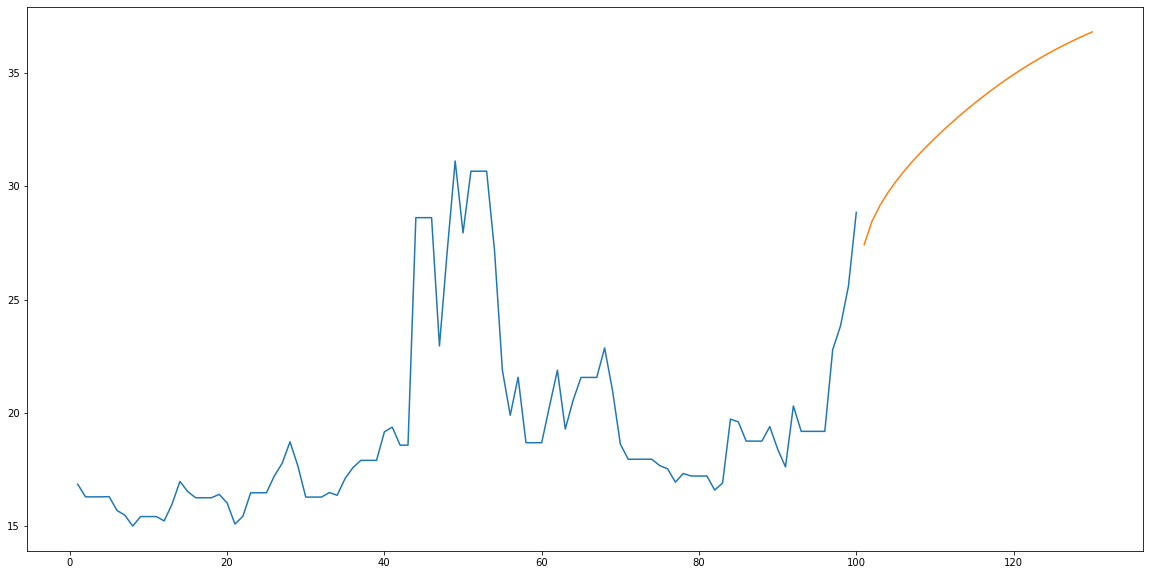

In [342]:
plt.figure(figsize=(20,10))
plt.plot(day_new,scaler.inverse_transform(alldataresetscaled[1725:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# MANIPULATING DATA FOR PLOTTING


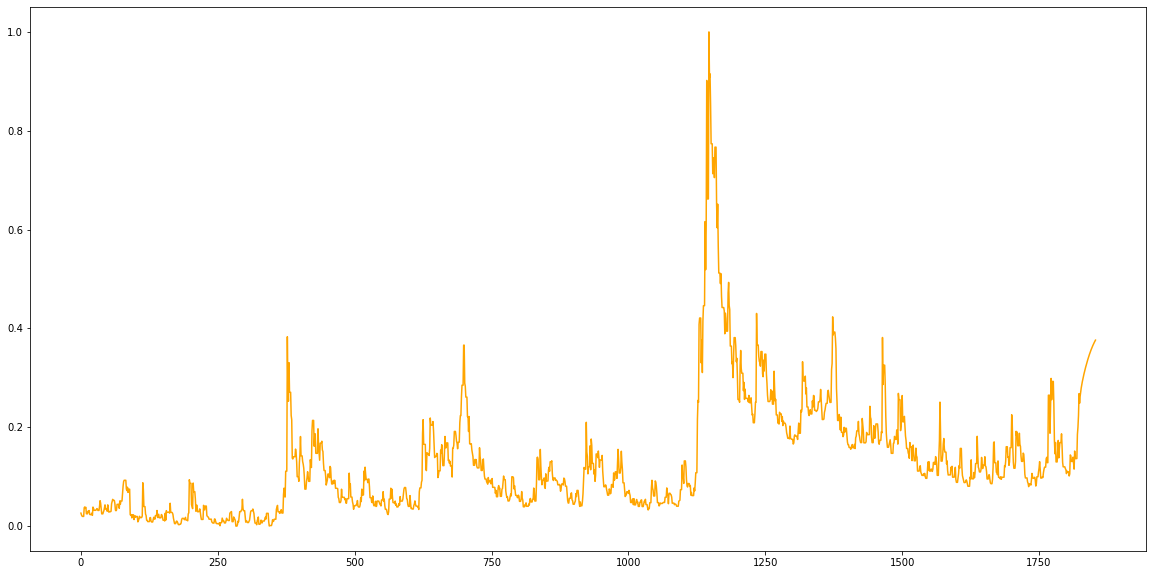

In [343]:
plt.figure(figsize=(20,10))
tempdata=alldataresetscaled.tolist()
tempdata.extend(lst_output)
plt.plot(tempdata[1:],color='orange')

In [344]:
tempdata1=scaler.inverse_transform(tempdata)

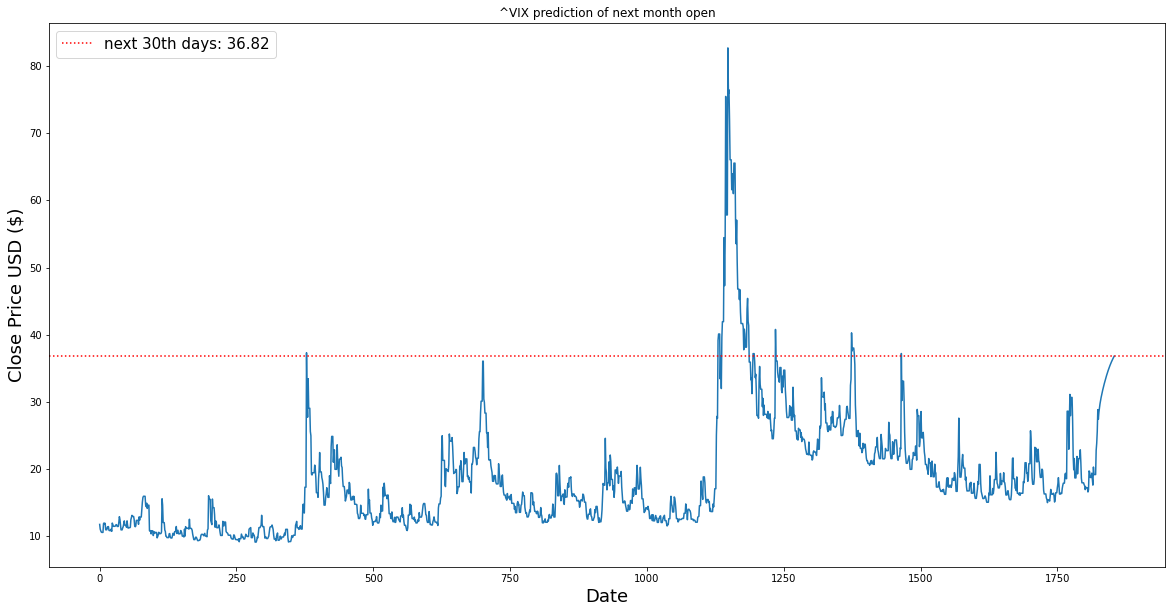

In [345]:
#Plotting final results with predicted value after 30 Days
plt.figure(figsize=(20,10))
plt.plot(tempdata1)
plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=tempdata1[len(tempdata1)-1], color = 'red', linestyle = ':', label = 'next 30th days: {0}'.format(round(float(*tempdata1[len(tempdata1)-1]),2)))
plt.legend(loc='upper left', fontsize=15)

In [346]:
import numpy as np

lst = tempdata1

float_lst = list(np.float_(lst))
    
print(float_lst)

[array([11.77000046]), array([11.06999969]), array([10.81000042]), array([10.63000011]), array([10.57999992]), array([10.57999992]), array([10.57999992]), array([11.88000011]), array([11.98999977]), array([11.81000042]), array([11.93000031]), array([10.97000027]), array([10.97000027]), array([10.97000027]), array([11.36999989]), array([11.28999996]), array([11.44999981]), array([10.88000011]), array([10.85000038]), array([10.85000038]), array([10.85000038]), array([11.06999969]), array([10.73999977]), array([11.97000027]), array([11.76000023]), array([11.48999977]), array([11.48999977]), array([11.48999977]), array([11.48999977]), array([11.56999969]), array([11.73999977]), array([11.71000004]), array([11.47000027]), array([11.47000027]), array([11.47000027]), array([12.09000015]), array([12.92000008]), array([12.53999996]), array([11.81000042]), array([10.96000004]), array([10.96000004]), array([10.96000004]), array([11.23999977]), array([11.44999981]), array([11.85999966]), array([12

In [347]:
tempdata2=float_lst

In [348]:
tempdata3 = np.array(tempdata2)
tempdata3

array([[11.77000046],
       [11.06999969],
       [10.81000042],
       ...,
       [36.50285511],
       [36.66307649],
       [36.81626387]])

In [349]:
tempdata4 = pd.DataFrame(tempdata3)
tempdata4.tail(31)

,0
1824,28.850000
1825,27.430743
1826,28.461964
1827,29.152818
1828,29.712035
1829,30.199946
1830,30.640197
1831,31.045708
1832,31.424945
1833,31.783752


In [350]:
newdate = pd.DataFrame()
newdate['Date'] = pd.date_range('23/01/2017', periods = 1855, freq ='d')
#1290= len data (1260) + prediction days (30)
newdate.tail(31)

,Date
1824,2022-01-21
1825,2022-01-22
1826,2022-01-23
1827,2022-01-24
1828,2022-01-25
1829,2022-01-26
1830,2022-01-27
1831,2022-01-28
1832,2022-01-29
1833,2022-01-30


In [351]:
tempdata5 = pd.concat([newdate,tempdata4],axis=1)

In [352]:
#Clean the dataset and rename columns for visual representations
tempdata5.set_index(tempdata5["Date"], inplace=True)

In [353]:
tempdata5.tail(31)

,Date,0
Date,,
2022-01-21,2022-01-21,28.850000
2022-01-22,2022-01-22,27.430743
2022-01-23,2022-01-23,28.461964
2022-01-24,2022-01-24,29.152818
2022-01-25,2022-01-25,29.712035
2022-01-26,2022-01-26,30.199946
2022-01-27,2022-01-27,30.640197
2022-01-28,2022-01-28,31.045708
2022-01-29,2022-01-29,31.424945


In [354]:
tempdata6=tempdata5.drop(['Date'], axis=1)
tempdata6.columns=['Forecasted_Close']

In [355]:
tempdata6.tail(31)

,Forecasted_Close
Date,
2022-01-21,28.850000
2022-01-22,27.430743
2022-01-23,28.461964
2022-01-24,29.152818
2022-01-25,29.712035
2022-01-26,30.199946
2022-01-27,30.640197
2022-01-28,31.045708
2022-01-29,31.424945


In [356]:
tempdata7=tempdata6.tail(31)
tempdata7

,Forecasted_Close
Date,
2022-01-21,28.850000
2022-01-22,27.430743
2022-01-23,28.461964
2022-01-24,29.152818
2022-01-25,29.712035
2022-01-26,30.199946
2022-01-27,30.640197
2022-01-28,31.045708
2022-01-29,31.424945


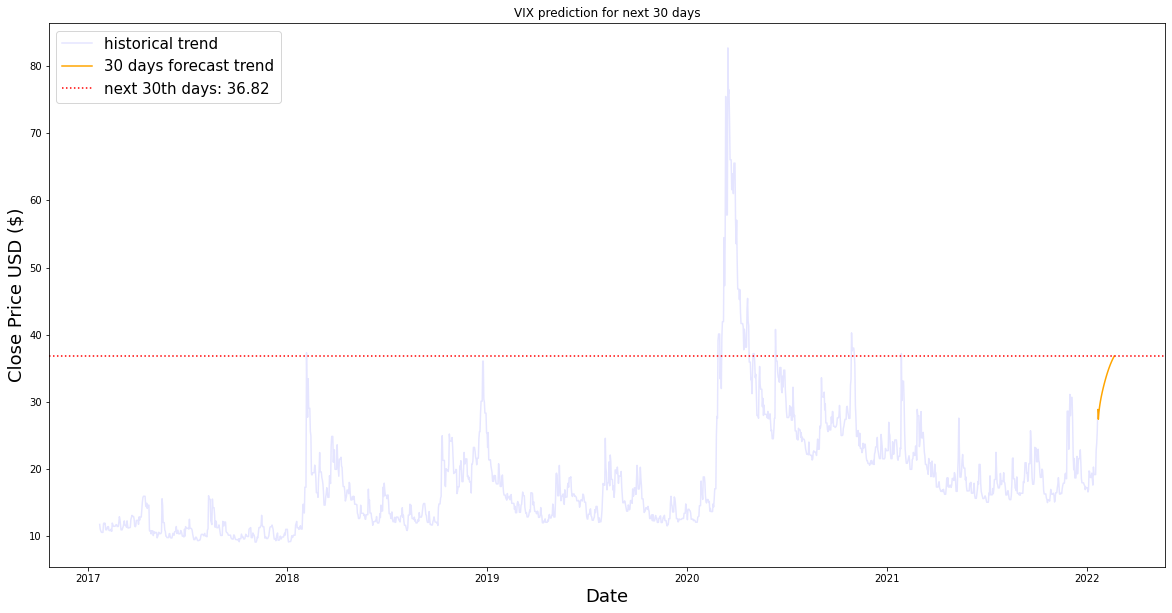

In [357]:
plt.figure(figsize=(20,10))
plt.title("{0} prediction for next 30 days".format(Object_study))

plt.xlabel ('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)' , fontsize = 18)

plt.plot(alldata['Close'],color='blue', alpha=0.1, label='historical trend')
plt.plot(tempdata7['Forecasted_Close'],color='orange', alpha=1, label='30 days forecast trend')
plt.axhline(y=tempdata1[len(tempdata1)-1], color = 'red', linestyle = ':', label = 'next 30th days: {0}'.format(round(float(*tempdata1[len(tempdata1)-1]),2)))

plt.legend(loc='upper left', fontsize=15)

In [358]:
tempdata6.tail(1)

,Forecasted_Close
Date,
2022-02-20,36.816264
